In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from skopt import BayesSearchCV

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
len(df)

8693

In [5]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
for name in ['CryoSleep', 'VIP', 'Name']: # У 'CryoSleep', 'VIP' можно заменять пустые на вероятность
    df[name].fillna(df[name].value_counts().index[0], inplace=True)

for name in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df[name].fillna(df[name].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19016\1285601926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[name].fillna(df[name].value_counts().index[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19016\1285601926.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[name].fillna(df[name]

In [8]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19016\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [10]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64

In [11]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
N = len(df)
parents = [0 for _ in range(N)]
for index in range(N):
    a, b = df['PassengerId'][index].split('_')
    try:
        sename = df['Name'][index].split(' ')[1]
    except:
        print(df['Name'][index])
    if b == '01':
        count = -1
        for i in range(index, N):
            if ((df['PassengerId'][i].split('_')[0] == a) and 
                (df['Name'][i].split(' ')[1] == sename)):
                count += 1
            else:
                break
        for i in range(index, index + count + 1):
            parents[i] = count

df['Parents'] = pd.Series(parents)

In [13]:
for name in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    q1 = df[name].quantile(0.25)  # первый квартиль
    q3 = df[name].quantile(0.75)  # третий квартиль
    median_value = df[name].median()
    df[name] = df[name].apply(lambda x: median_value if ((x < q1) or (x > q3)) else x)

In [14]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Parents
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,0.0,9.0,0.0,0.0,0.0,Juanna Vines,True,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,27.0,True,0.0,0.0,0.0,0.0,0.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,0.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,2.0,Willy Santantines,True,0


In [15]:
df.drop(['Cabin'], axis=1, inplace=True)

df.drop(['Name'], axis=1, inplace=True)

df.drop(['HomePlanet'], axis=1, inplace=True)

df.drop(['Destination'], axis=1, inplace=True)

<Axes: >

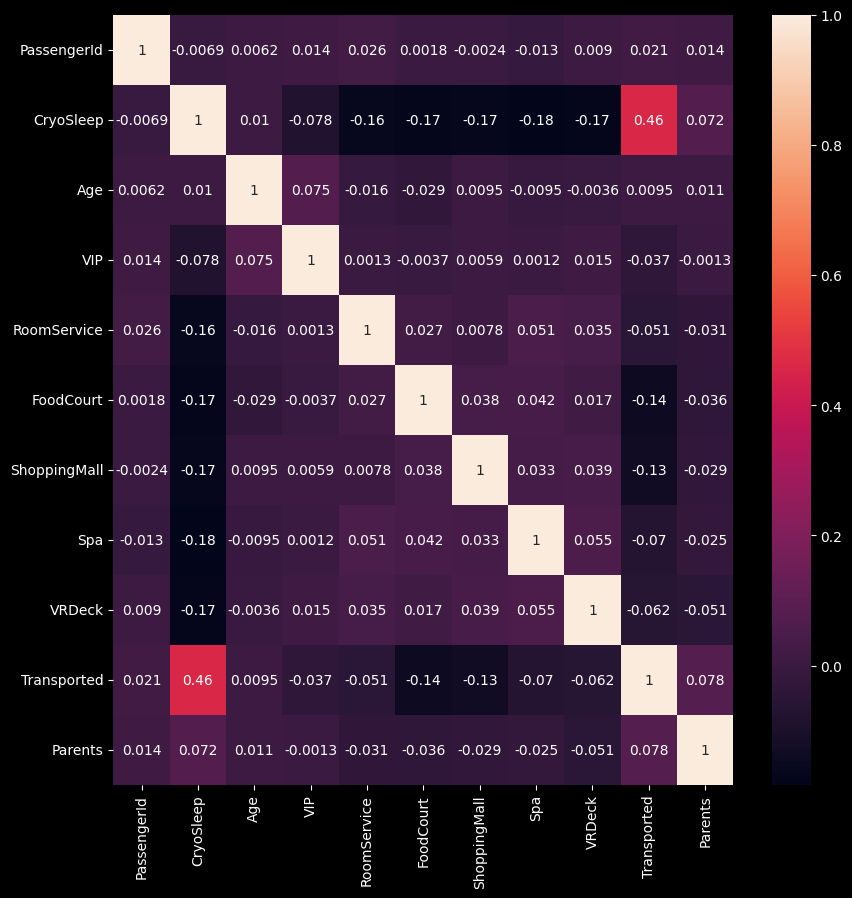

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, 
        annot=True)

In [17]:
# for name in ['Spa', 'VRDeck', 'ShoppingMall', 'FoodCourt', 'PassengerId']:
#     df.drop([name], axis=1, inplace=True)  

In [18]:
df.isna().sum()

PassengerId     0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Parents         0
dtype: int64

In [19]:
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Parents
0,0001_01,False,27.0,False,0.0,0.0,0.0,0.0,0.0,False,0
1,0002_01,False,24.0,False,0.0,9.0,0.0,0.0,0.0,True,0
2,0003_01,False,27.0,True,0.0,0.0,0.0,0.0,0.0,False,1
3,0003_02,False,33.0,False,0.0,0.0,0.0,0.0,0.0,False,1
4,0004_01,False,27.0,False,0.0,0.0,0.0,0.0,2.0,True,0


In [20]:
df['VIP'] = np.where(df['VIP'], 1, 0)
df['Transported'] = np.where(df['Transported'], 1, 0)
df['CryoSleep'] = np.where(df['CryoSleep'], 1, 0)

In [21]:
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Parents
0,0001_01,0,27.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0002_01,0,24.0,0,0.0,9.0,0.0,0.0,0.0,1,0
2,0003_01,0,27.0,1,0.0,0.0,0.0,0.0,0.0,0,1
3,0003_02,0,33.0,0,0.0,0.0,0.0,0.0,0.0,0,1
4,0004_01,0,27.0,0,0.0,0.0,0.0,0.0,2.0,1,0


In [22]:
y_vals = df['Transported'].copy()

In [23]:
for name in ['Age', 'RoomService', 'Parents']:
    df[[name]] = (df[[name]] - df[[name]].min()) / (df[[name]].max() - df[[name]].min())

In [24]:
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Parents
0,0001_01,0,0.411765,0,0.0,0.0,0.0,0.0,0.0,0,0.000000
1,0002_01,0,0.235294,0,0.0,9.0,0.0,0.0,0.0,1,0.000000
2,0003_01,0,0.411765,1,0.0,0.0,0.0,0.0,0.0,0,0.142857
3,0003_02,0,0.764706,0,0.0,0.0,0.0,0.0,0.0,0,0.142857
4,0004_01,0,0.411765,0,0.0,0.0,0.0,0.0,2.0,1,0.000000


<Axes: >

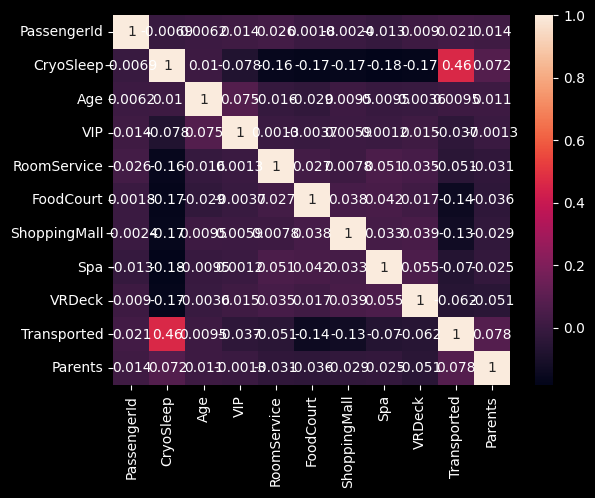

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, 
        annot=True)

In [26]:
X, Y = df.drop(['Transported'], axis=1), df['Transported'].copy()

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Random Forest

## Grid Search

In [28]:
param_grid = {
    'n_estimators': [75, 100, 125, 150],
    'max_depth': [5, 10, 15, 20],
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
rf_grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [75, 100, 125, 150]},
             scoring='accuracy')

In [29]:
print("Best parameters found: ", rf_grid_search.best_params_)
print("Best cross-validated accuracy: ", rf_grid_search.best_score_)

Best parameters found:  {'max_depth': 10, 'n_estimators': 150}
Best cross-validated accuracy:  0.7201314708299096


In [30]:
max_depth, n_estimators = rf_grid_search.best_params_['max_depth'], rf_grid_search.best_params_['n_estimators']

In [31]:
rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
rf_model.fit(X_train, Y_train)

rf_predictions = rf_model.predict(X_test)

In [32]:
res_df = pd.DataFrame({'real_data': Y_test, 'predicted_data': rf_predictions})
res_df.head(10)

,real_data,predicted_data
304,1,0
2697,0,0
8424,0,1
1672,1,0
8458,1,1
3438,1,0
3362,0,0
3235,0,0
1139,1,1
1210,0,0


In [33]:
res_df['score'] = np.where(res_df['real_data'] == res_df['predicted_data'], 1, 0)
print(f'{res_df['score'].sum()} / {len(res_df)}')
res_df['score'].sum() / len(res_df)

1885 / 2608


np.float64(0.7227760736196319)

## Random Search

In [34]:
param_dist = {
    'n_estimators': randint(5, 300),
    'max_depth': randint(1, 30),
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=5, random_state=42)
rf_random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000270BE1F2D80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000270BE462810>},
                   random_state=42, scoring='accuracy')

In [35]:
print("Best parameters found: ", rf_random_search.best_params_)
print("Best cross-validated accuracy: ", rf_random_search.best_score_)

Best parameters found:  {'max_depth': 10, 'n_estimators': 192}
Best cross-validated accuracy:  0.7206244864420706


In [36]:
max_depth, n_estimators = rf_random_search.best_params_['max_depth'], rf_random_search.best_params_['n_estimators']

In [37]:
rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
rf_model.fit(X_train, Y_train)

rf_predictions = rf_model.predict(X_test)

In [38]:
res_df = pd.DataFrame({'real_data': Y_test, 'predicted_data': rf_predictions})
res_df.head(10)

,real_data,predicted_data
304,1,0
2697,0,0
8424,0,1
1672,1,0
8458,1,1
3438,1,0
3362,0,0
3235,0,0
1139,1,1
1210,0,0


In [39]:
res_df['score'] = np.where(res_df['real_data'] == res_df['predicted_data'], 1, 0)
print(f'{res_df['score'].sum()} / {len(res_df)}')
res_df['score'].sum() / len(res_df)

1887 / 2608


np.float64(0.723542944785276)

## Bayesian Optimization

In [40]:
opt = BayesSearchCV(
    RandomForestClassifier(random_state=42),
    {
        'n_estimators': (50, 300),
        'max_depth': (1, 30),
    },
    n_iter=32,
    cv=5,
    n_jobs=-1
)

opt.fit(X_train, Y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(7), np.int64(300)] before, using random point [np.int64(11), np.int64(253)]
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(7), np.int64(300)] before, using random point [np.int64(15), np.int64(96)]
  warnings.warn(


BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_iter=32, n_jobs=-1,
              search_spaces={'max_depth': (1, 30), 'n_estimators': (50, 300)})

In [41]:
print("Best parameters found: ", opt.best_params_)
print("Best cross-validated accuracy: ", opt.best_score_)

Best parameters found:  OrderedDict({'max_depth': 10, 'n_estimators': 243})
Best cross-validated accuracy:  0.7211175020542318


In [42]:
max_depth, n_estimators = opt.best_params_['max_depth'], opt.best_params_['n_estimators']

In [43]:
rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
rf_model.fit(X_train, Y_train)

rf_predictions = rf_model.predict(X_test)

In [44]:
res_df = pd.DataFrame({'real_data': Y_test, 'predicted_data': rf_predictions})
res_df.head(10)

,real_data,predicted_data
304,1,0
2697,0,0
8424,0,1
1672,1,0
8458,1,1
3438,1,0
3362,0,0
3235,0,0
1139,1,1
1210,0,0


In [45]:
res_df['score'] = np.where(res_df['real_data'] == res_df['predicted_data'], 1, 0)
print(f'{res_df['score'].sum()} / {len(res_df)}')
res_df['score'].sum() / len(res_df)

1886 / 2608


np.float64(0.723159509202454)

# XGBoost

## Grid Search

In [46]:
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                                param_grid=param_grid_xgb, 
                                scoring='accuracy', 
                                cv=5)
xgb_grid_search.fit(X_train, Y_train)

ValueError: 
All the 225 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1512, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 596, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1003, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 1573, in __init__
    self._init(
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 1632, in _init
    it.reraise()
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 550, in _handle_exception
    return fn()
           ^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py", line 1388, in next
    input_data(**self.kwargs)
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py", line 1431, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py", line 603, in _transform_pandas_df
    pandas_check_dtypes(data, enable_categorical)
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py", line 569, in pandas_check_dtypes
    _invalid_dataframe_dtype(data)
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py", line 356, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:PassengerId: object


In [ ]:
print("Grid Search - Best parameters found: ", xgb_grid_search.best_params_)
print("Grid Search - Best cross-validated accuracy: ", xgb_grid_search.best_score_)
max_depth, n_estimators, learning_rate = xgb_grid_search.best_params_['max_depth'], xgb_grid_search.best_params_['n_estimators'], xgb_grid_search.best_params_['learning_rate']

Grid Search - Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Grid Search - Best cross-validated accuracy:  0.7150369761709122


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=n_estimators, 
                          max_depth=max_depth, learning_rate=learning_rate, random_state=42)
xgb_model.fit(X_train, Y_train)

xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(Y_test, xgb_predictions))

XGBoost Accuracy: 0.7216257668711656


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Random Search

In [ ]:
param_dist_xgb = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
}

xgb_random_search = RandomizedSearchCV(XGBClassifier(eval_metric='logloss'), 
                                       param_distributions=param_dist_xgb, 
                                       n_iter=20, 
                                       scoring='accuracy', 
                                       cv=5, 
                                       random_state=42)
xgb_random_search.fit(X_train, Y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022B64875E80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022B5B52E660>},
                   random_state=42, scoring='accuracy')

In [ ]:
print("Random Search - Best parameters found: ", xgb_random_search.best_params_)
print("Random Search - Best cross-validated accuracy: ", xgb_random_search.best_score_)
max_depth, n_estimators, learning_rate = xgb_random_search.best_params_['max_depth'], xgb_random_search.best_params_['n_estimators'], xgb_random_search.best_params_['learning_rate']

Random Search - Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 268}
Random Search - Best cross-validated accuracy:  0.714872637633525


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=n_estimators, 
                          max_depth=max_depth, learning_rate=learning_rate, random_state=42)
xgb_model.fit(X_train, Y_train)

xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(Y_test, xgb_predictions))

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7216257668711656


## Bayesian Optimization

In [ ]:
opt = BayesSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    {
        'n_estimators': (50, 300),
        'max_depth': (3, 10),
        'learning_rate': (0.01, 0.3, 'uniform'),
    },
    n_iter=32,
    cv=5,
    n_jobs=-1
)
opt.fit(X_train, Y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='logloss', feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate...
                                      max_cat_threshold=None,
                                      max_cat_to_onehot=None,
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=42, ...),
              n_iter=32, n_jobs=-1,
              search_spaces={'learning_rate': (0.01, 0.3, 'uniform'),
                             'max_depth': (3, 10), 'n_estimators': (50, 300)})

In [ ]:
print("Bayesian Optimization - Best parameters found: ", opt.best_params_)
print("Bayesian Optimization - Best cross-validated accuracy: ", opt.best_score_)
max_depth, n_estimators, learning_rate = opt.best_params_['max_depth'], opt.best_params_['n_estimators'], opt.best_params_['learning_rate']

Bayesian Optimization - Best parameters found:  OrderedDict({'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50})
Bayesian Optimization - Best cross-validated accuracy:  0.7150369761709122


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=n_estimators, 
                          max_depth=max_depth, learning_rate=learning_rate, random_state=42)
xgb_model.fit(X_train, Y_train)

xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(Y_test, xgb_predictions))

XGBoost Accuracy: 0.7216257668711656


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
